In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


df = pd.read_csv("datasets/cleaned/clean_44k.csv")  
X = df.drop(columns=["label"])
y = df["label"]

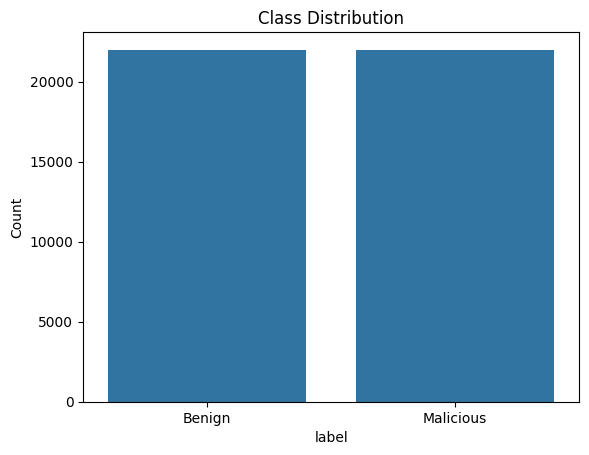

In [2]:
sns.countplot(x=y)
plt.title("Class Distribution")
plt.xticks([0, 1], ["Benign", "Malicious"])
plt.ylabel("Count")
plt.show()

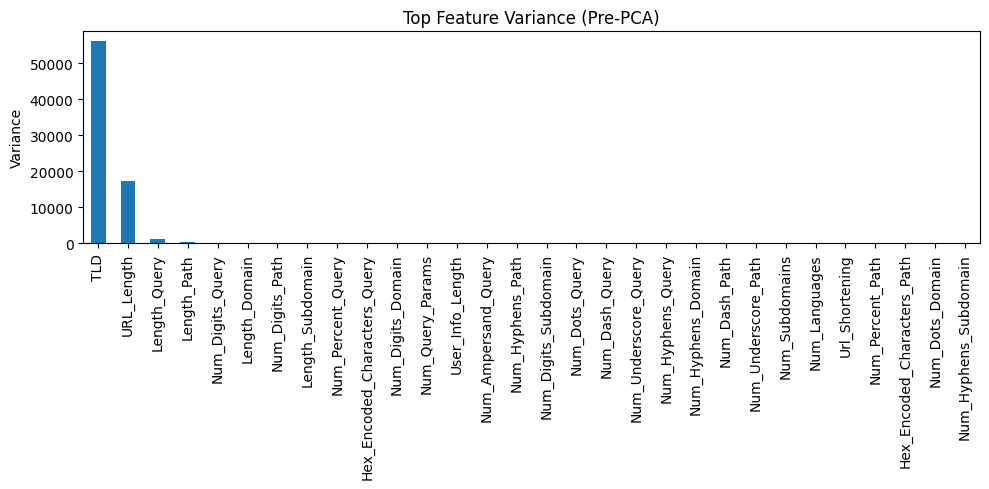

In [3]:
variances = X.var().sort_values(ascending=False)
plt.figure(figsize=(10, 5))
variances.head(30).plot(kind='bar')
plt.title("Top Feature Variance (Pre-PCA)")
plt.ylabel("Variance")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

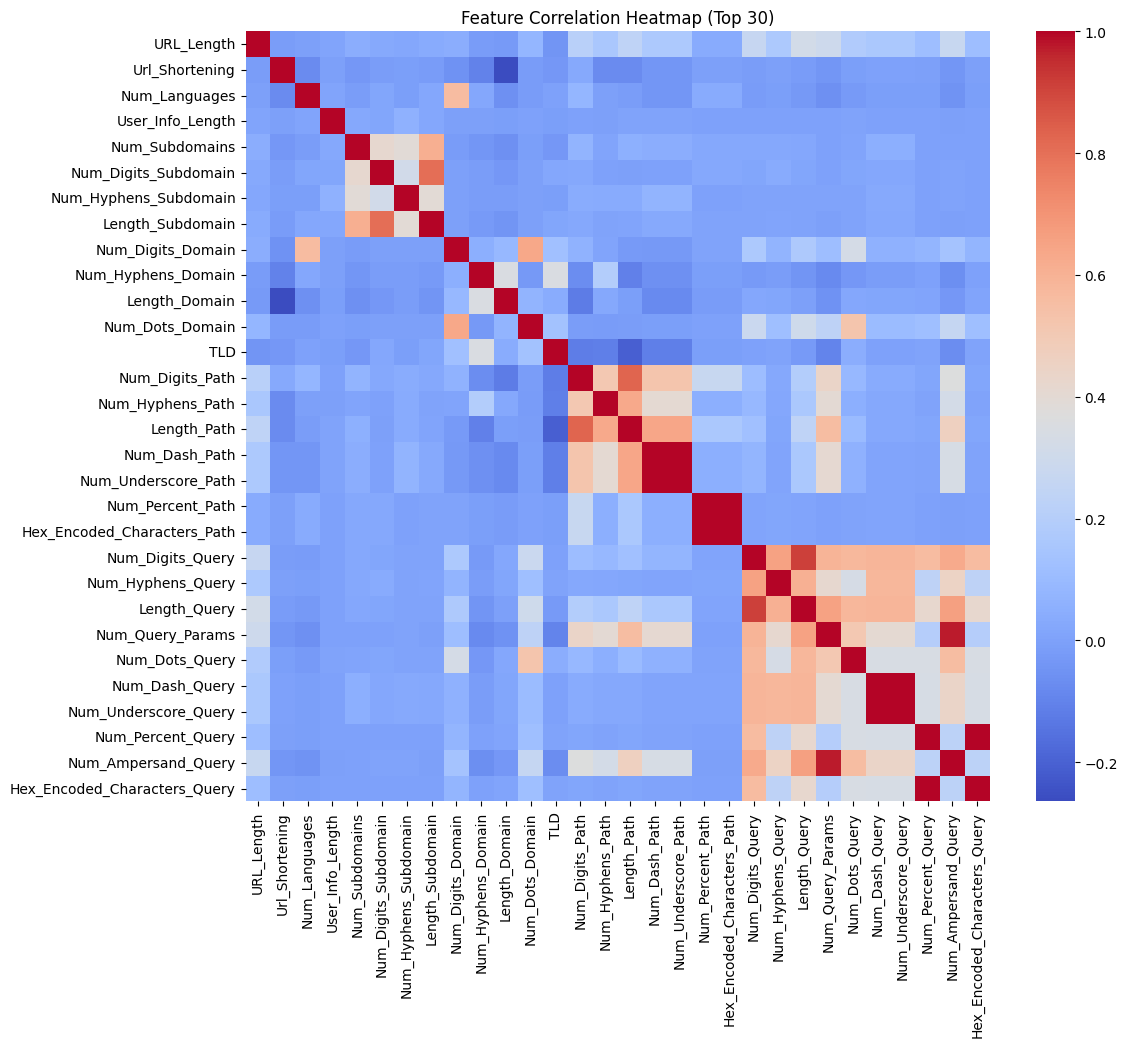

In [4]:
plt.figure(figsize=(12, 10))
corr = X.corr()
sns.heatmap(corr.iloc[:30, :30], cmap="coolwarm", annot=False)
plt.title("Feature Correlation Heatmap (Top 30)")
plt.show()

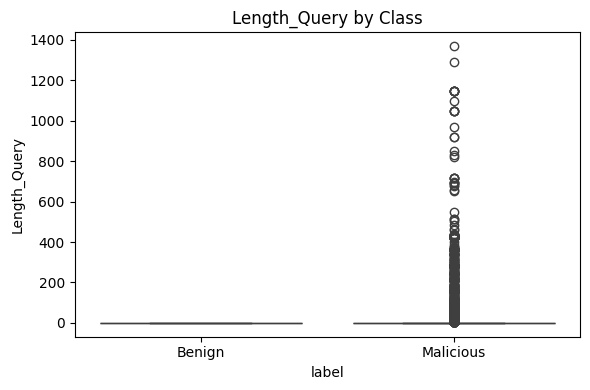

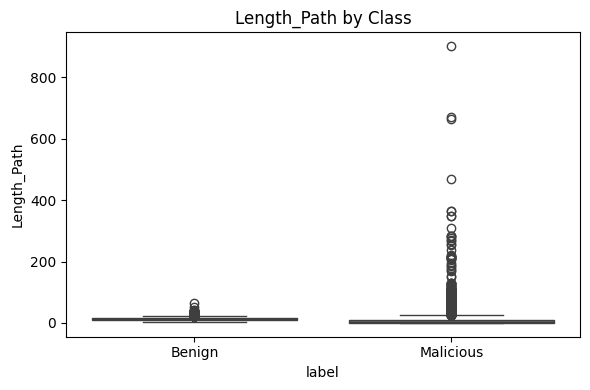

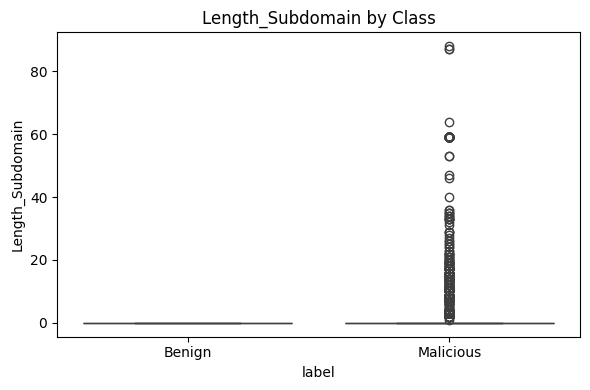

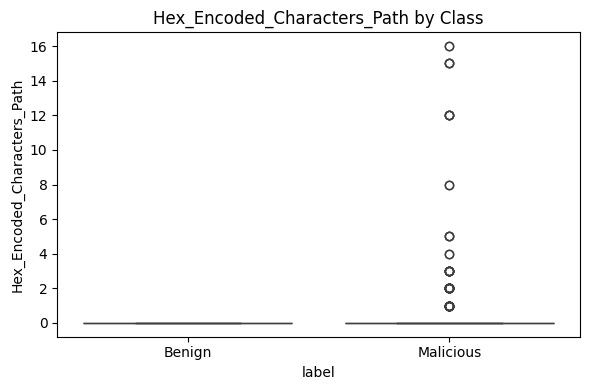

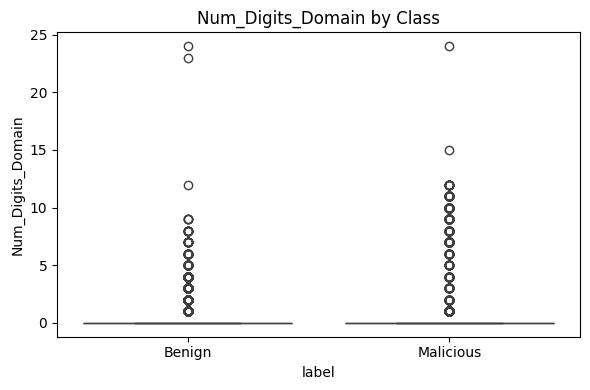

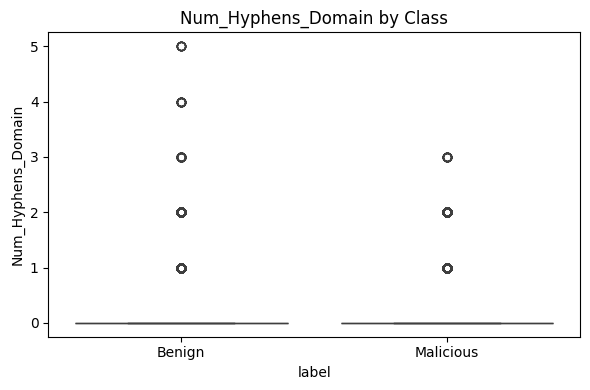

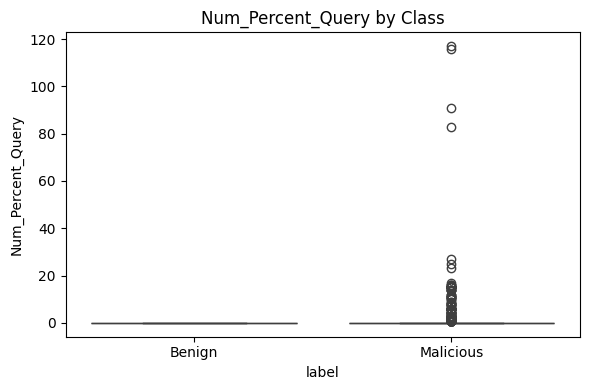

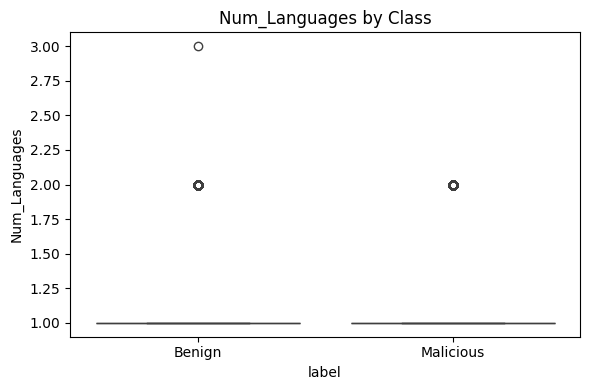

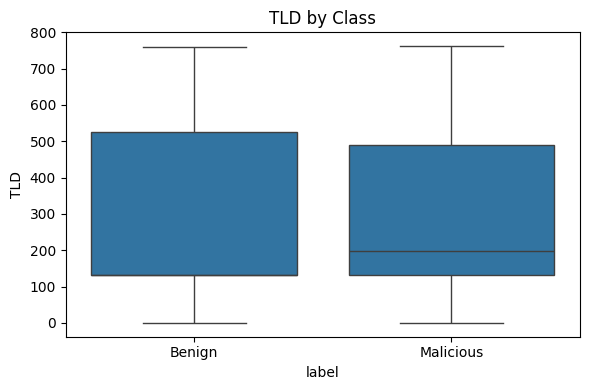

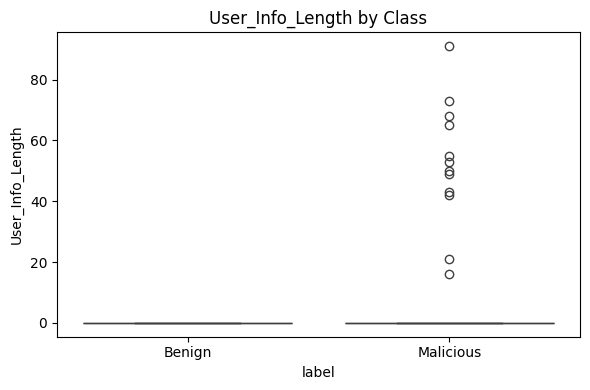

In [5]:
final_features = ['Length_Query', 'Length_Path', 'Length_Subdomain',
                  'Hex_Encoded_Characters_Path', 'Num_Digits_Domain',
                  'Num_Hyphens_Domain', 'Num_Percent_Query', 'Num_Languages',
                  'TLD', 'User_Info_Length']

for feature in final_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=y, y=df[feature])
    plt.title(f"{feature} by Class")
    plt.xticks([0, 1], ["Benign", "Malicious"])
    plt.tight_layout()
    plt.show()

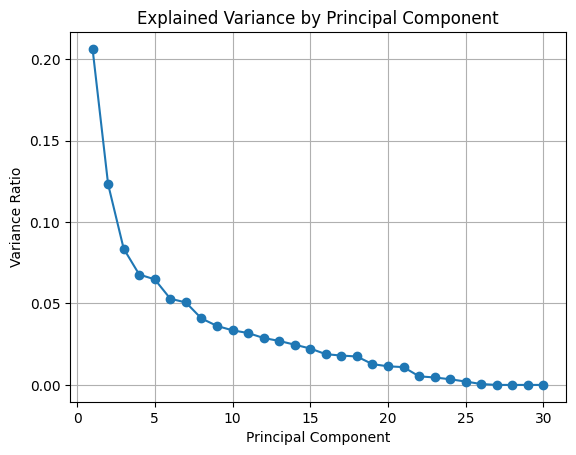

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA()
pca.fit(X_scaled)

plt.plot(range(1, len(pca.explained_variance_ratio_)+1),
         pca.explained_variance_ratio_, marker='o')
plt.title("Explained Variance by Principal Component")
plt.xlabel("Principal Component")
plt.ylabel("Variance Ratio")
plt.grid(True)
plt.show()